In [11]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import plotly.offline as py
import plotly.graph_objs as go

## Load dataset

In [12]:
data_dir = "disease_dataset/"
data = pd.read_csv(data_dir+"diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
data.shape

(768, 9)

In [14]:
data.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,3.0000,6.00000,9.0000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,57.00000,79.00000,117.0000,140.25000,167.0000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.00000,38.70000,72.0000,80.00000,88.0000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,32.00000,40.0000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,127.25000,210.0000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,0.00000,21.80000,32.0000,36.60000,41.5000,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.14035,0.3725,0.62625,0.8786,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,29.0000,41.00000,51.0000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00


#### check null values

In [15]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


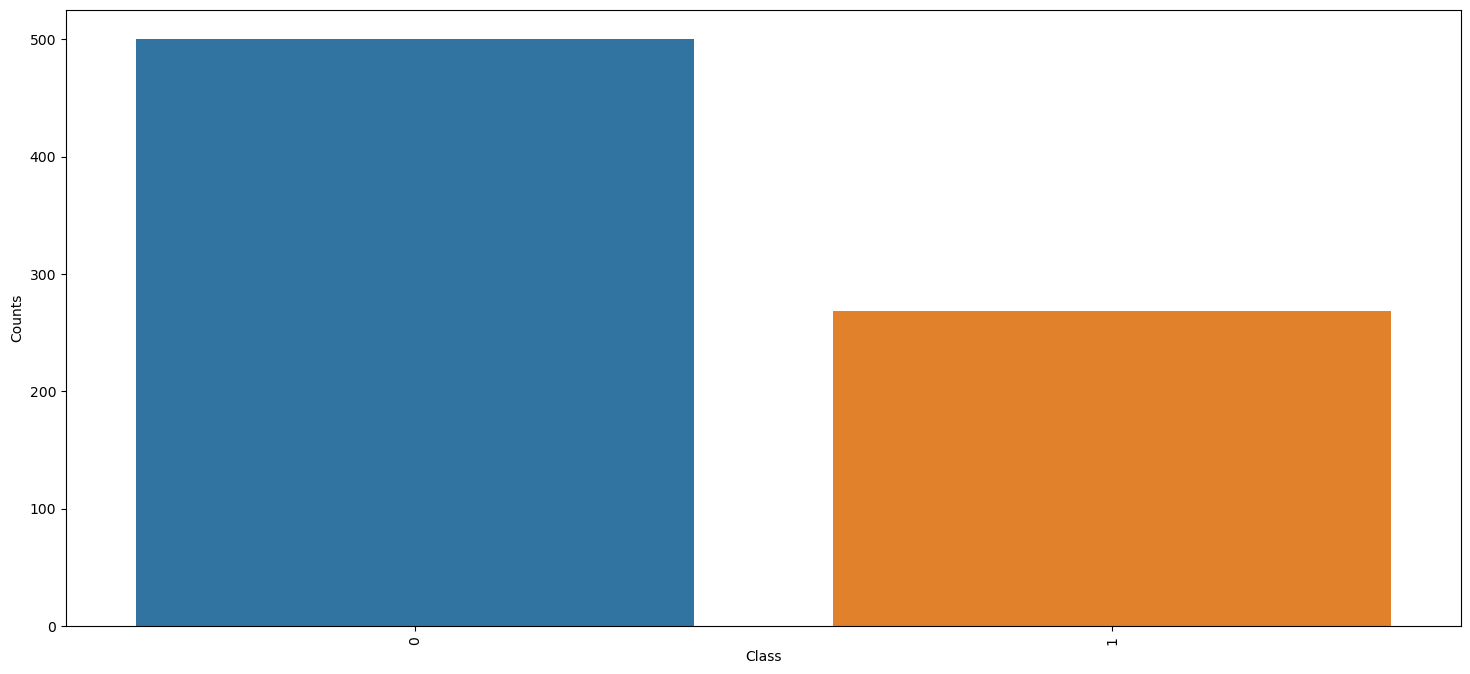

In [17]:
# Checking whether the dataset is balanced or not
disease_counts = data["Outcome"].value_counts()
temp_df = pd.DataFrame({
    "Class": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (18,8))
sns.barplot(x = "Class", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [18]:
def target_variable_distribution(data):
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15),
                   marker=dict(colors=['lightskyblue', 'orange']))
    
    layout = dict(title =  'Distribution of Target Variable (Outcome)')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

    
target_variable_distribution(data)

### Correlation Matrix

<Axes: >

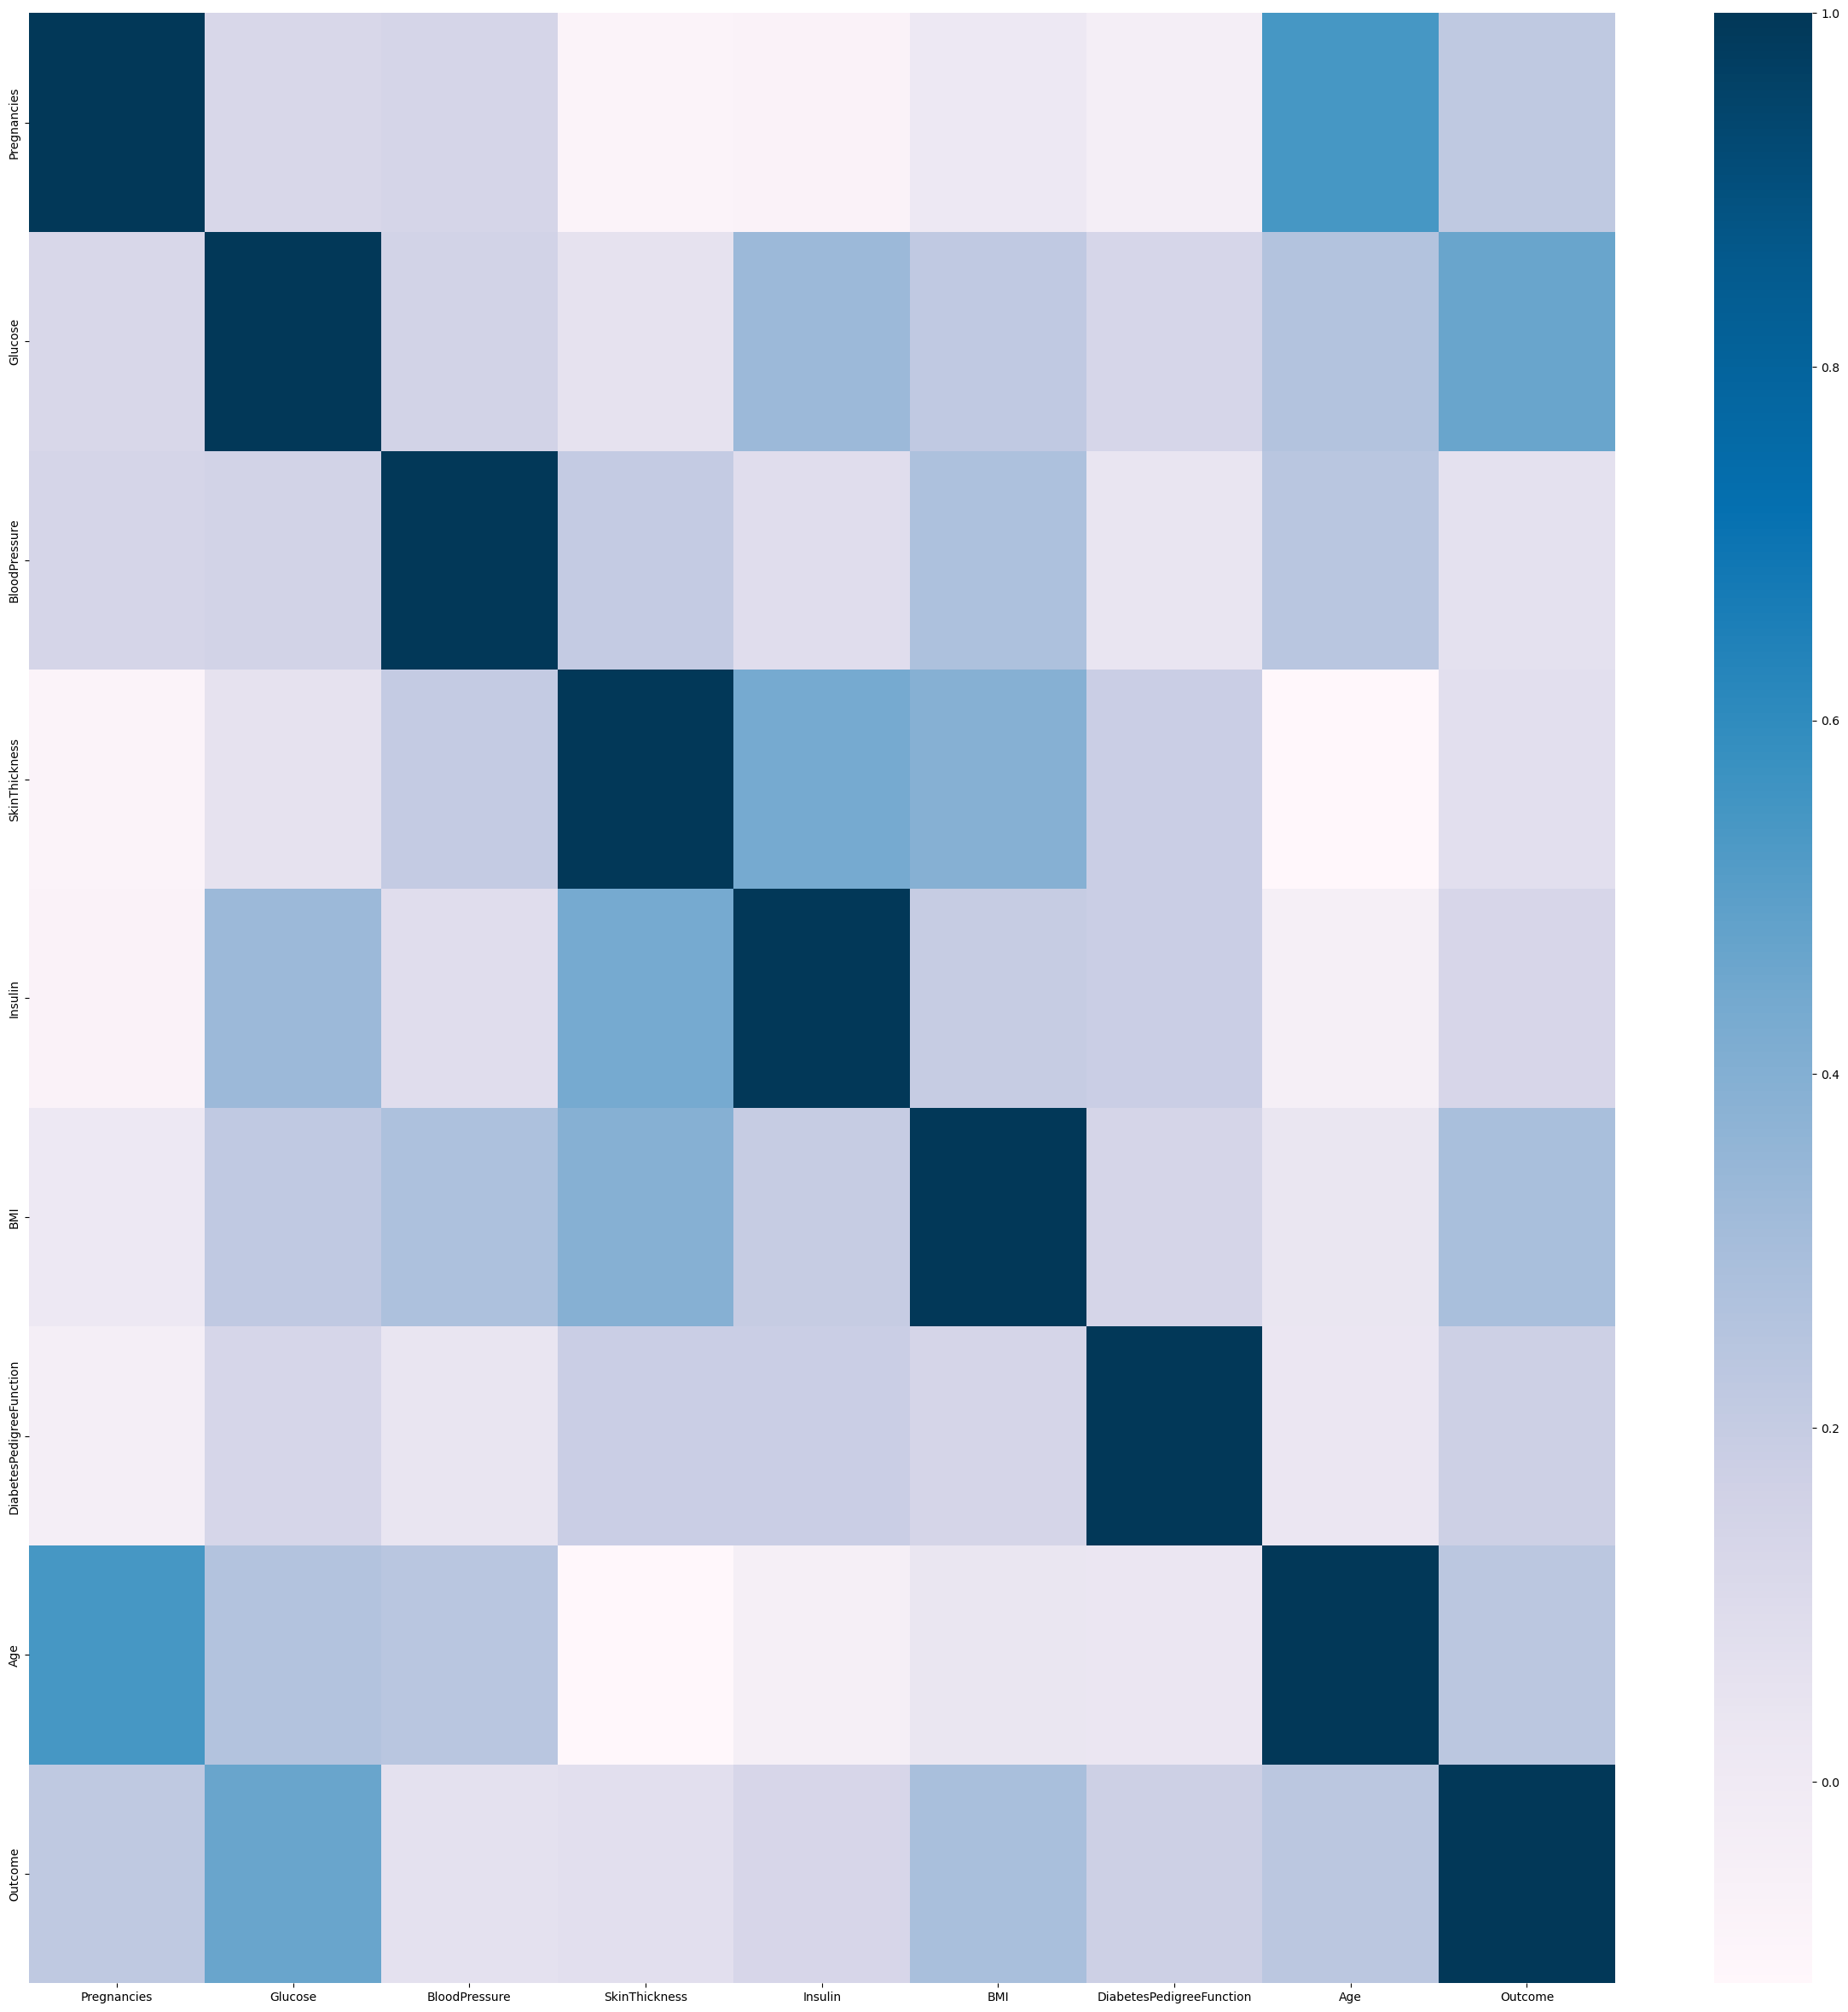

In [19]:
plt.figure(figsize = (30, 30))
sns.heatmap(data.corr(), cmap = 'PuBu', annot = False)

In [20]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 7))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

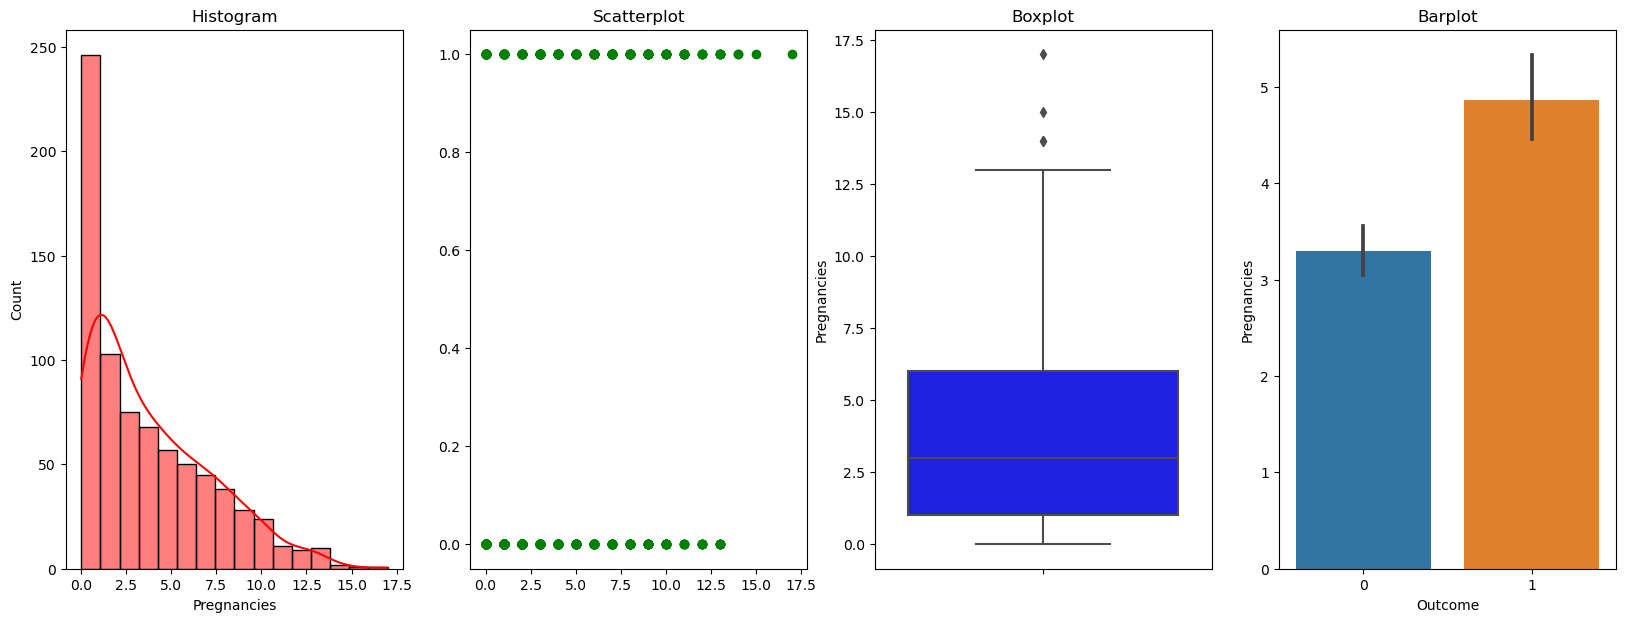

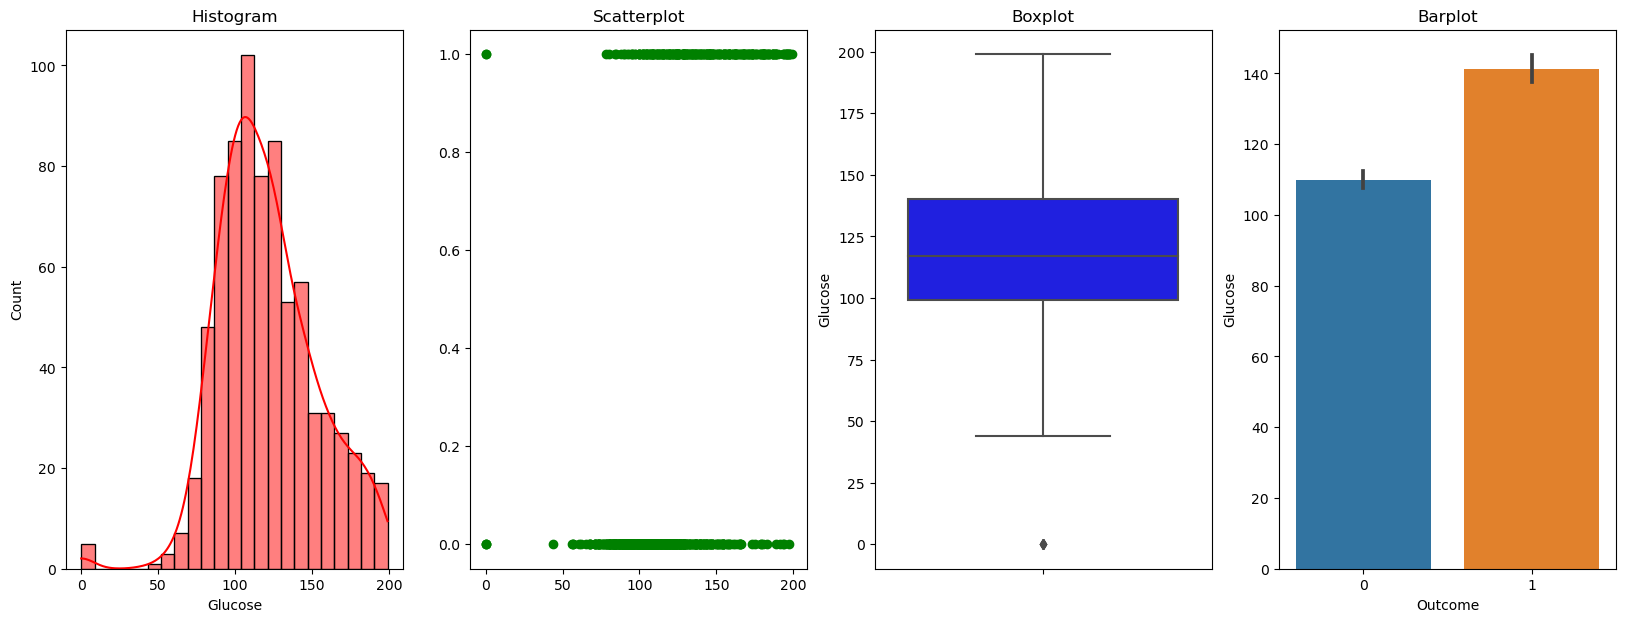

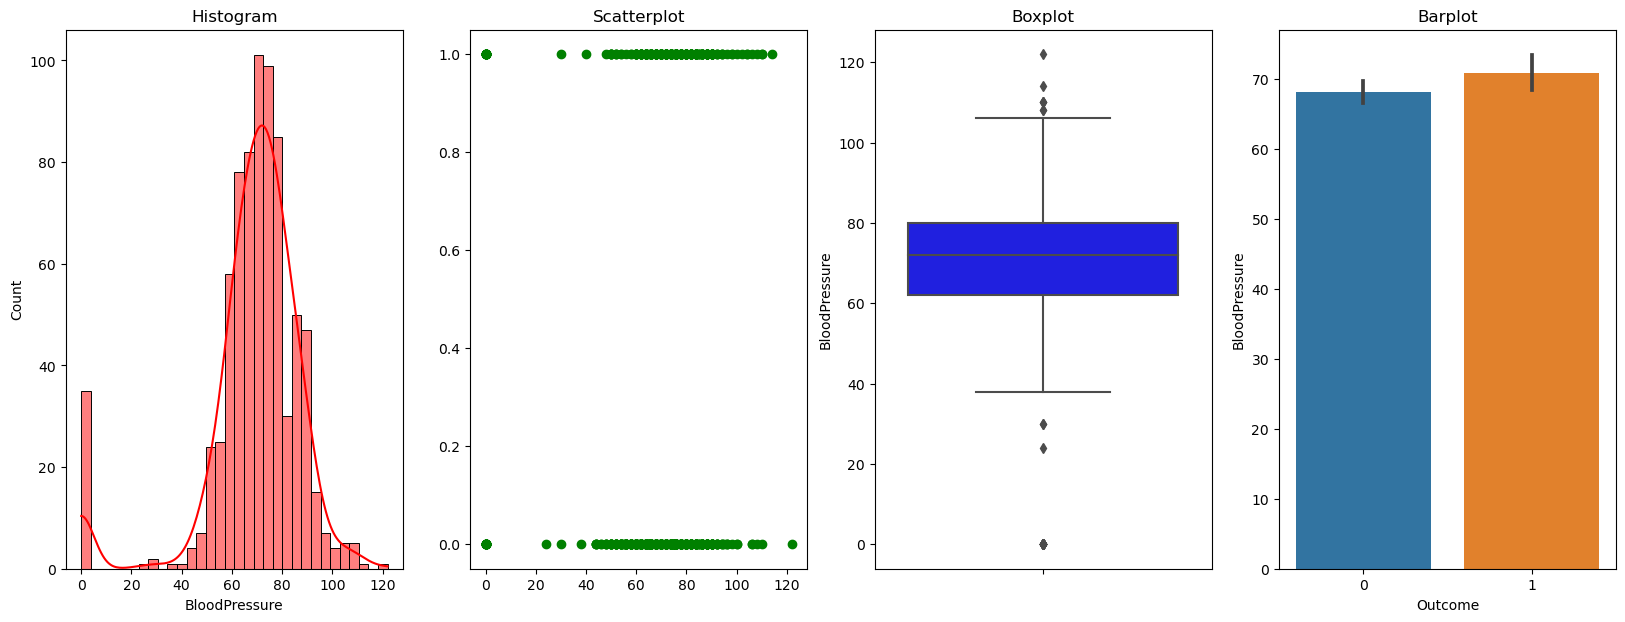

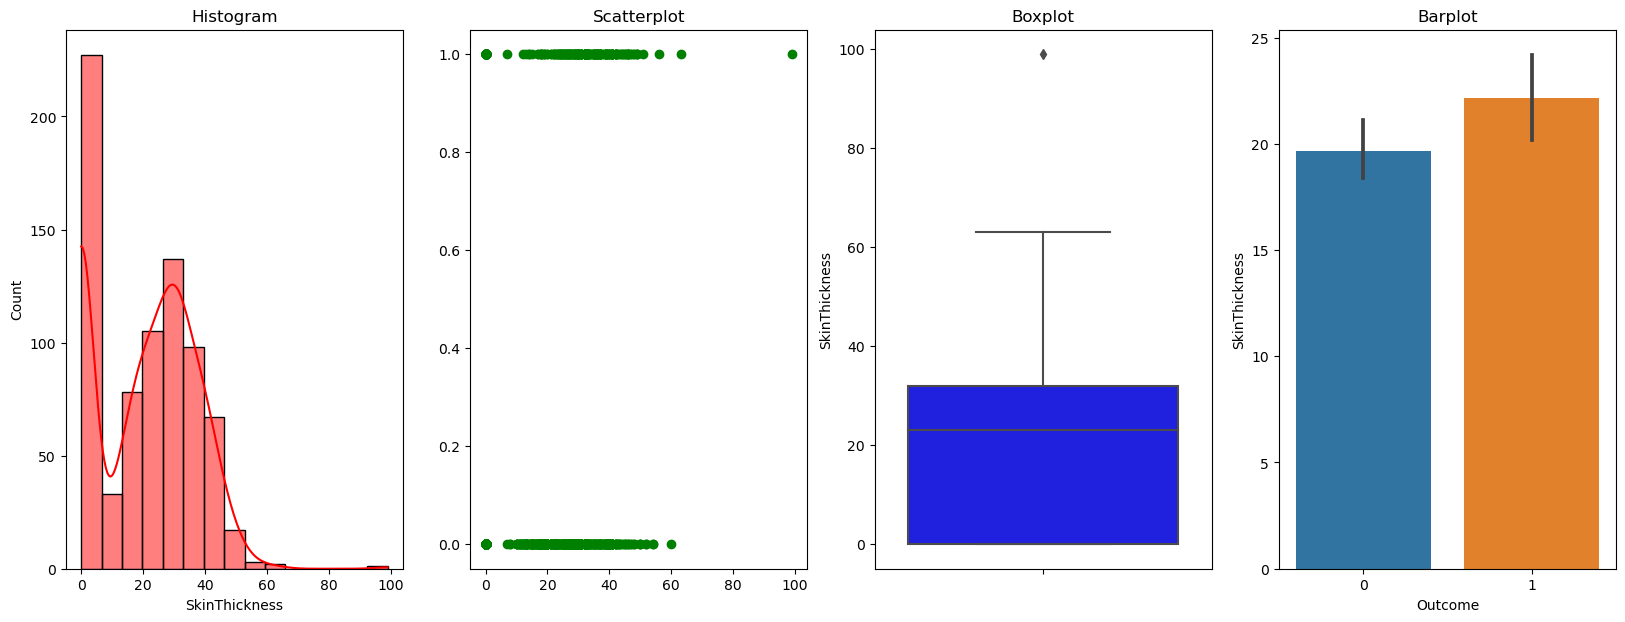

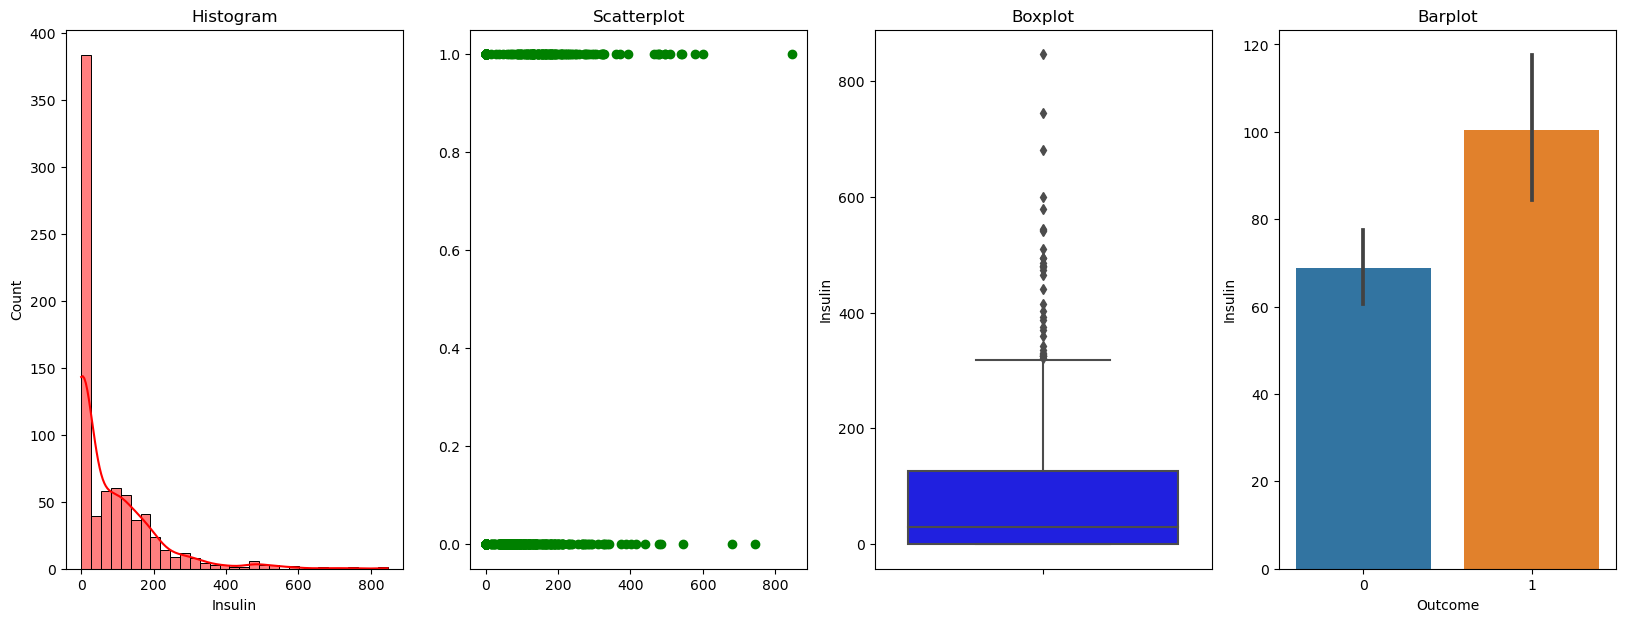

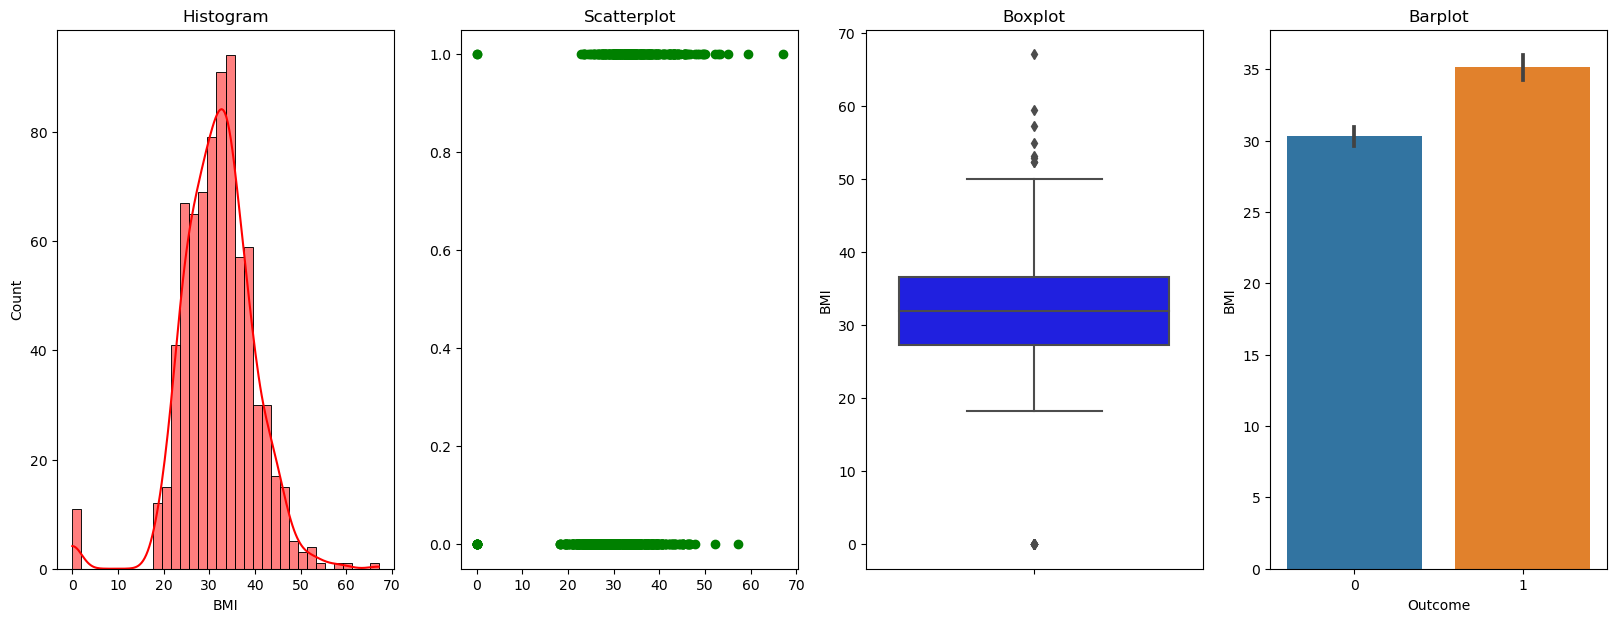

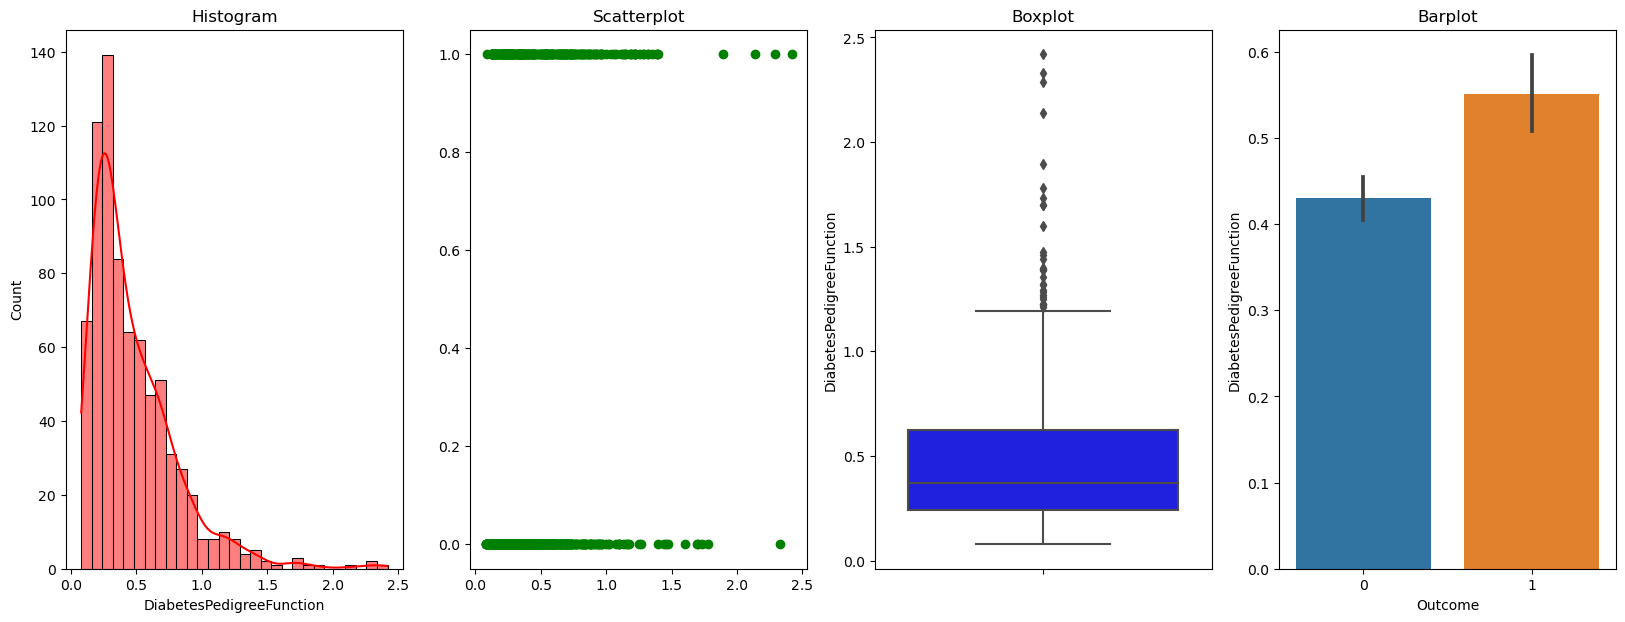

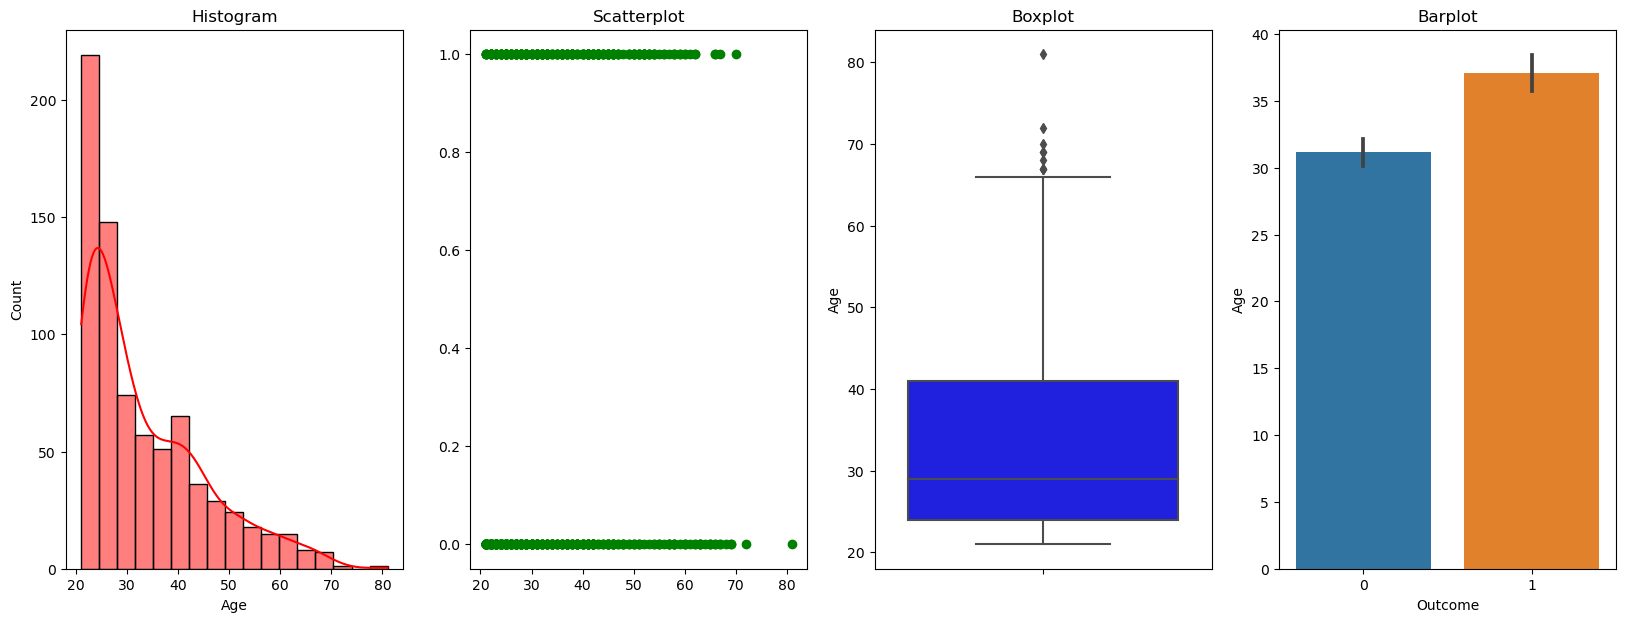

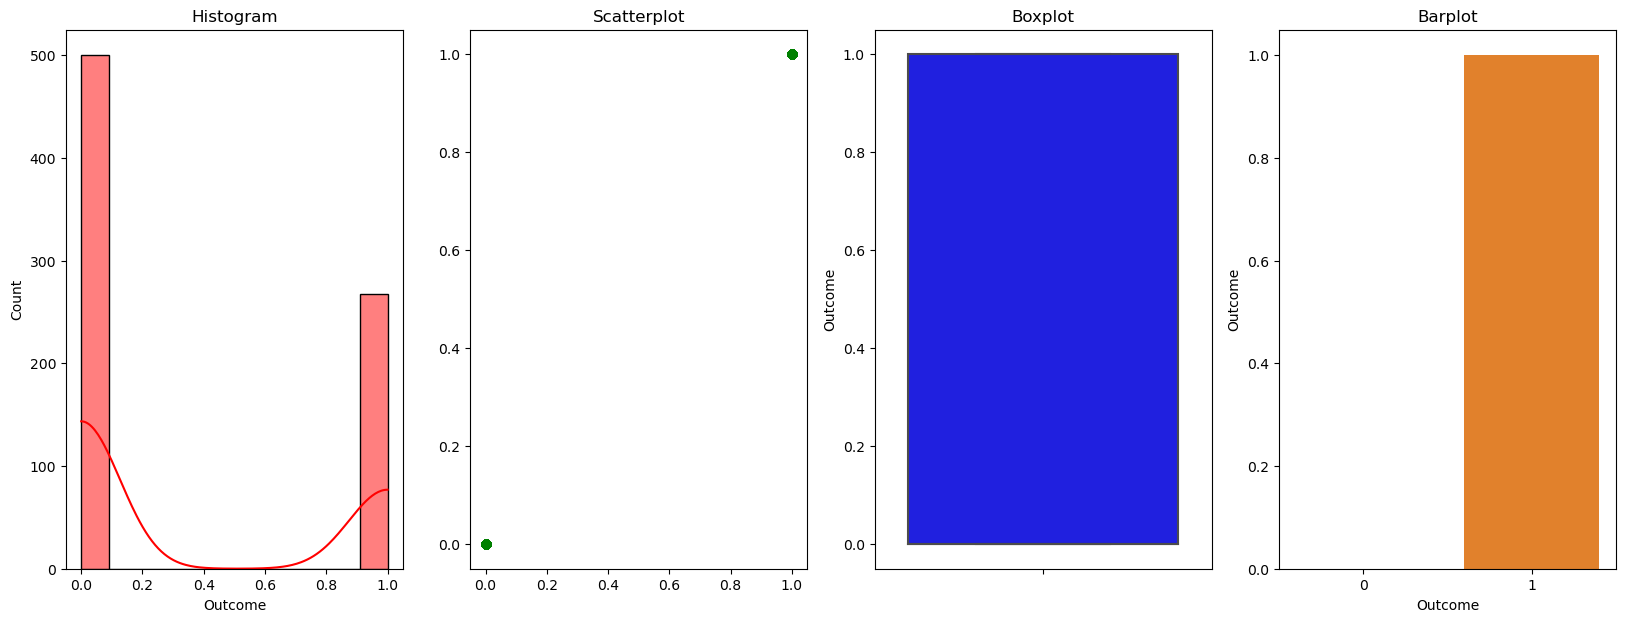

In [21]:
for col in data:
    diagnostic_plots(data,col,'Outcome')

### Data Preprocessing

In [22]:
# Getting zero and less than zero values counts in each column
# Glucose	BloodPressure	SkinThickness	Insulin	BMI
cols= data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in cols:
    zero_values = len(data[data[col] <= 0])
    print("Number of zero or less tha zero values in column {} are {}".format(col,zero_values))

Number of zero or less tha zero values in column Glucose are 5
Number of zero or less tha zero values in column BloodPressure are 35
Number of zero or less tha zero values in column SkinThickness are 227
Number of zero or less tha zero values in column Insulin are 374
Number of zero or less tha zero values in column BMI are 11


In skin thickness and insuli boxplot, the plot is starting from zero which is weird because a human even a pregnant female cannot have zero skin thickness and insulin level. So, I will replace the values equal to zero in these columns with the median of the column values.

In [23]:
cols= data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in cols:
    median = data[col].median()
    data.loc[data[col]<=0,col] = median

In [24]:
# Getting zero and less than zero values counts in each column
# Glucose	BloodPressure	SkinThickness	Insulin	BMI
cols= data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in cols:
    zero_values = len(data[data[col] <= 0])
    print("Number of zero or less tha zero values in column {} are {}".format(col,zero_values))

Number of zero or less tha zero values in column Glucose are 0
Number of zero or less tha zero values in column BloodPressure are 0
Number of zero or less tha zero values in column SkinThickness are 0
Number of zero or less tha zero values in column Insulin are 0
Number of zero or less tha zero values in column BMI are 0


In [25]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

In [26]:
df = mod_outlier(data)

C:\Users\Eaint Lay Hmone\AppData\Local\Temp\ipykernel_2368\926679308.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Eaint Lay Hmone\AppData\Local\Temp\ipykernel_2368\926679308.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Eaint Lay Hmone\AppData\Local\Temp\ipykernel_2368\926679308.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Eaint Lay Hmone\AppData\Local\Temp\ipykernel_2368\926679308.py:1

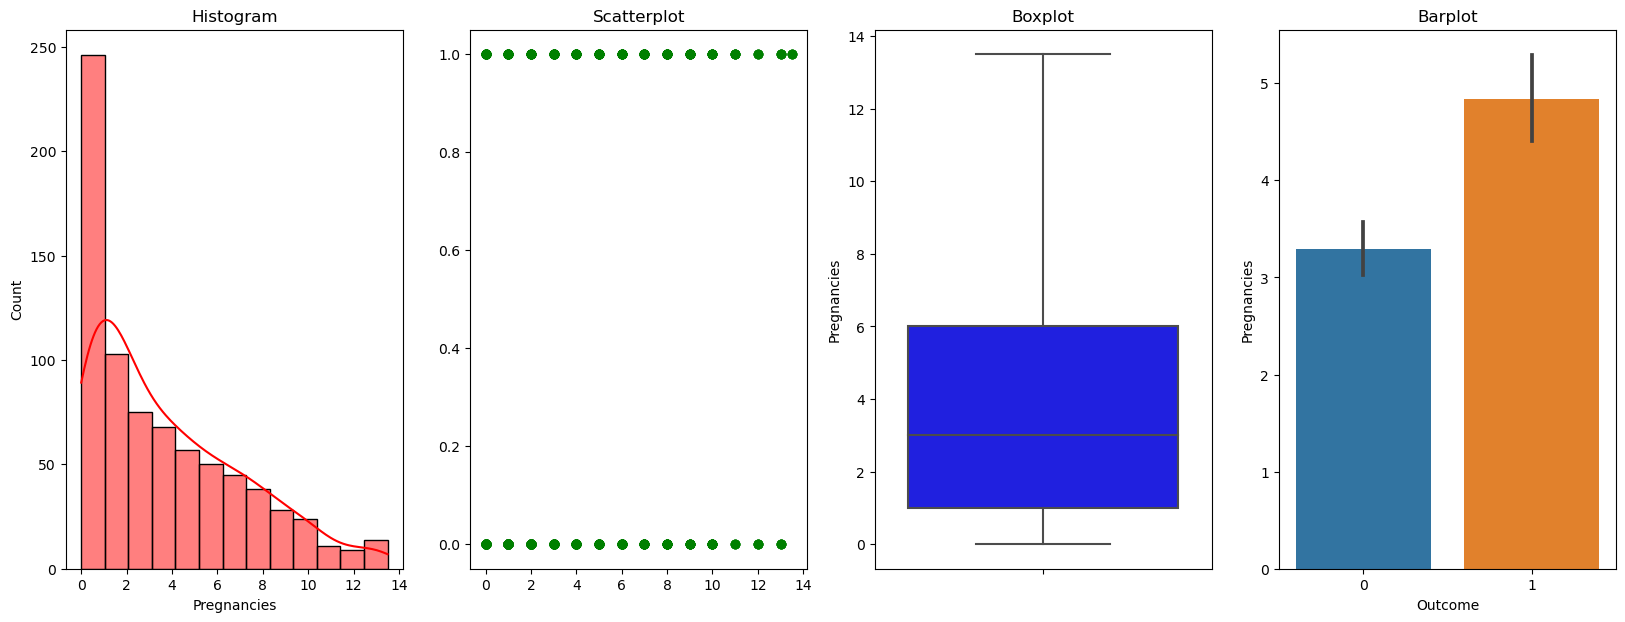

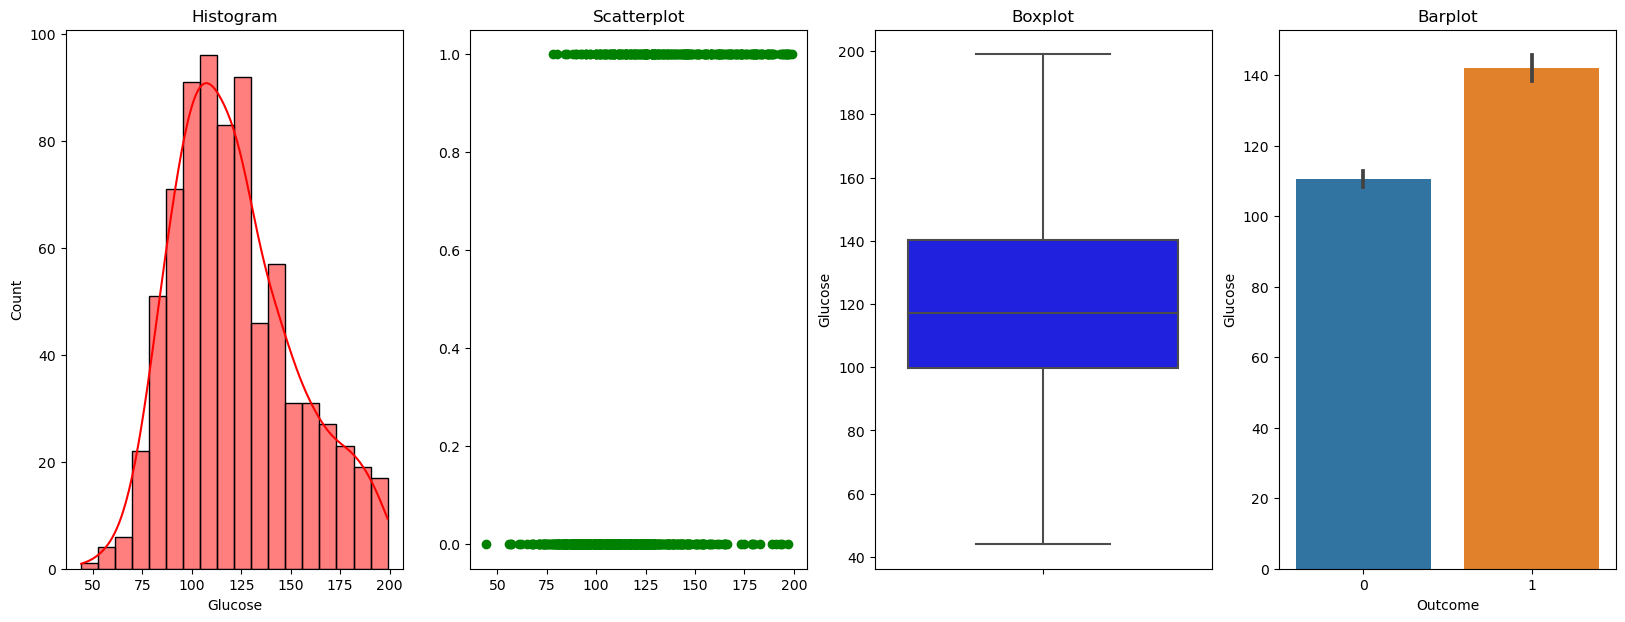

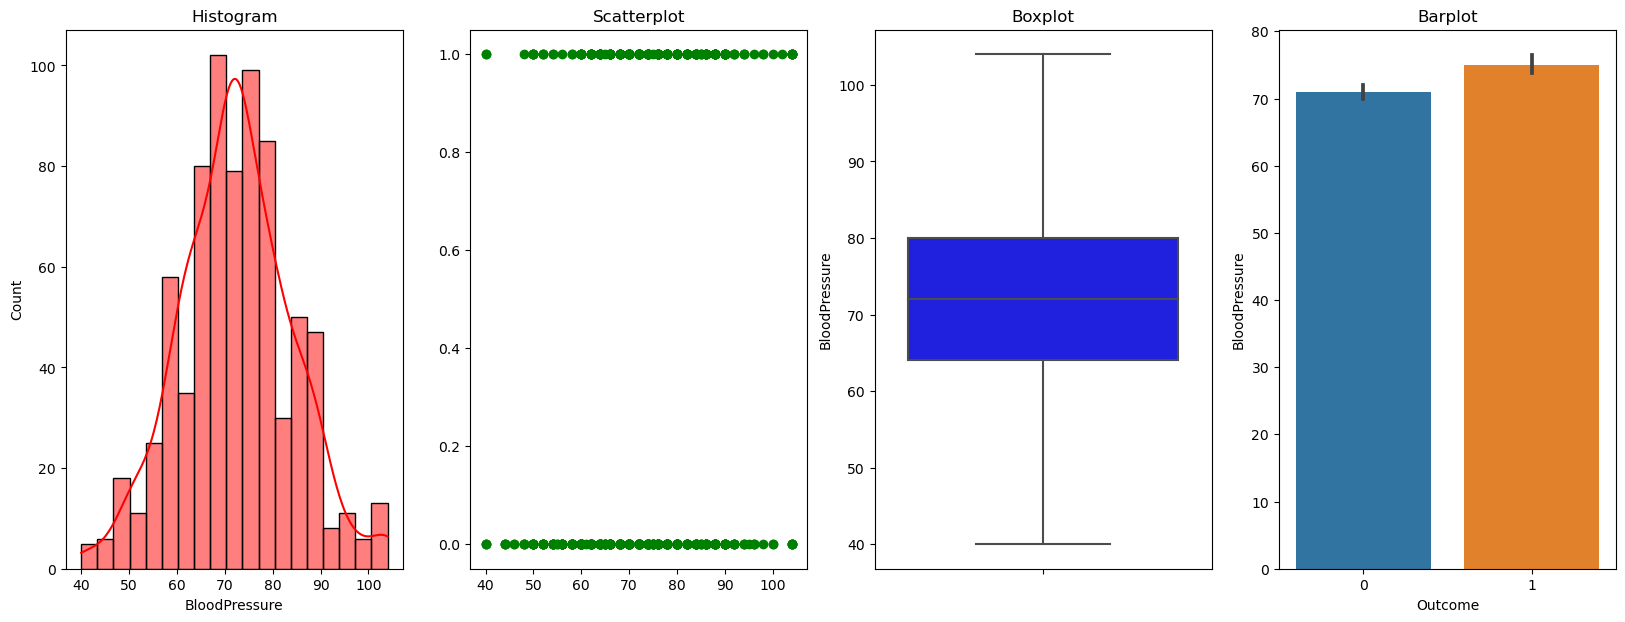

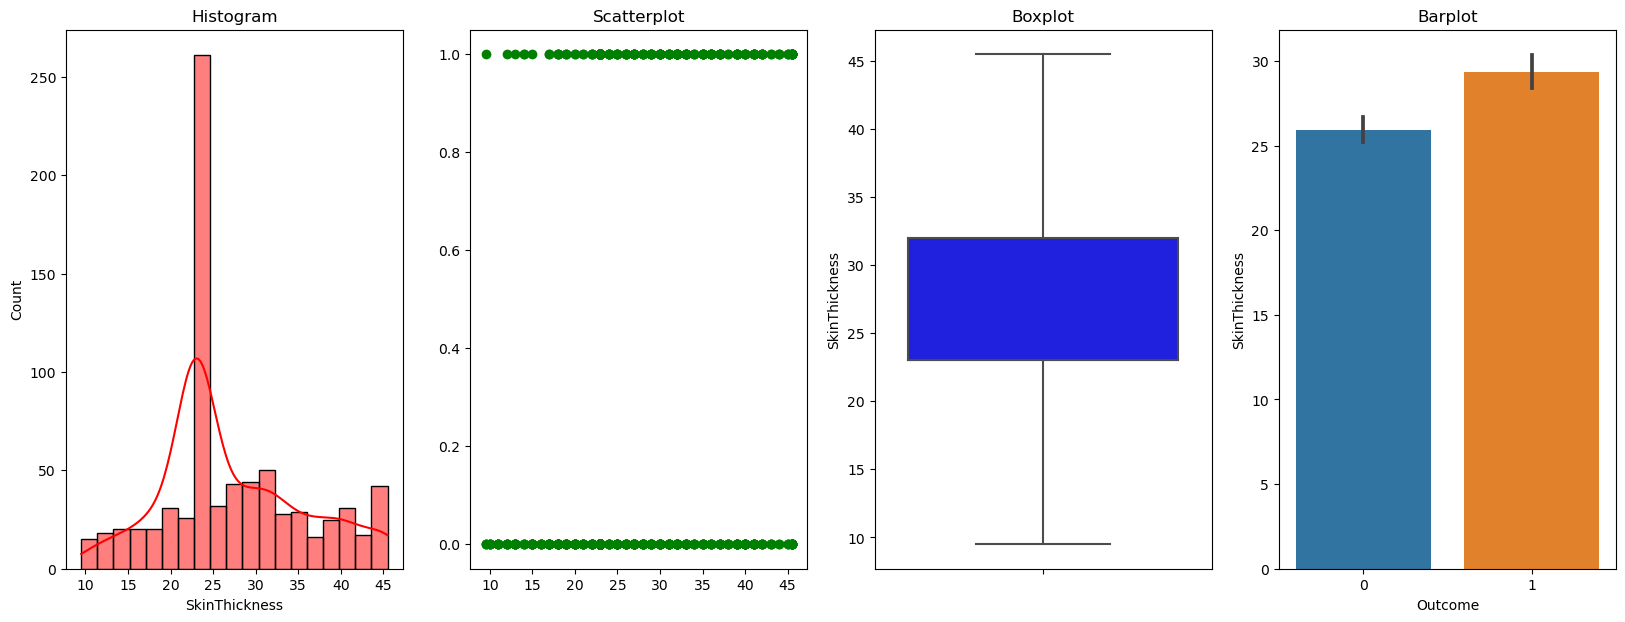

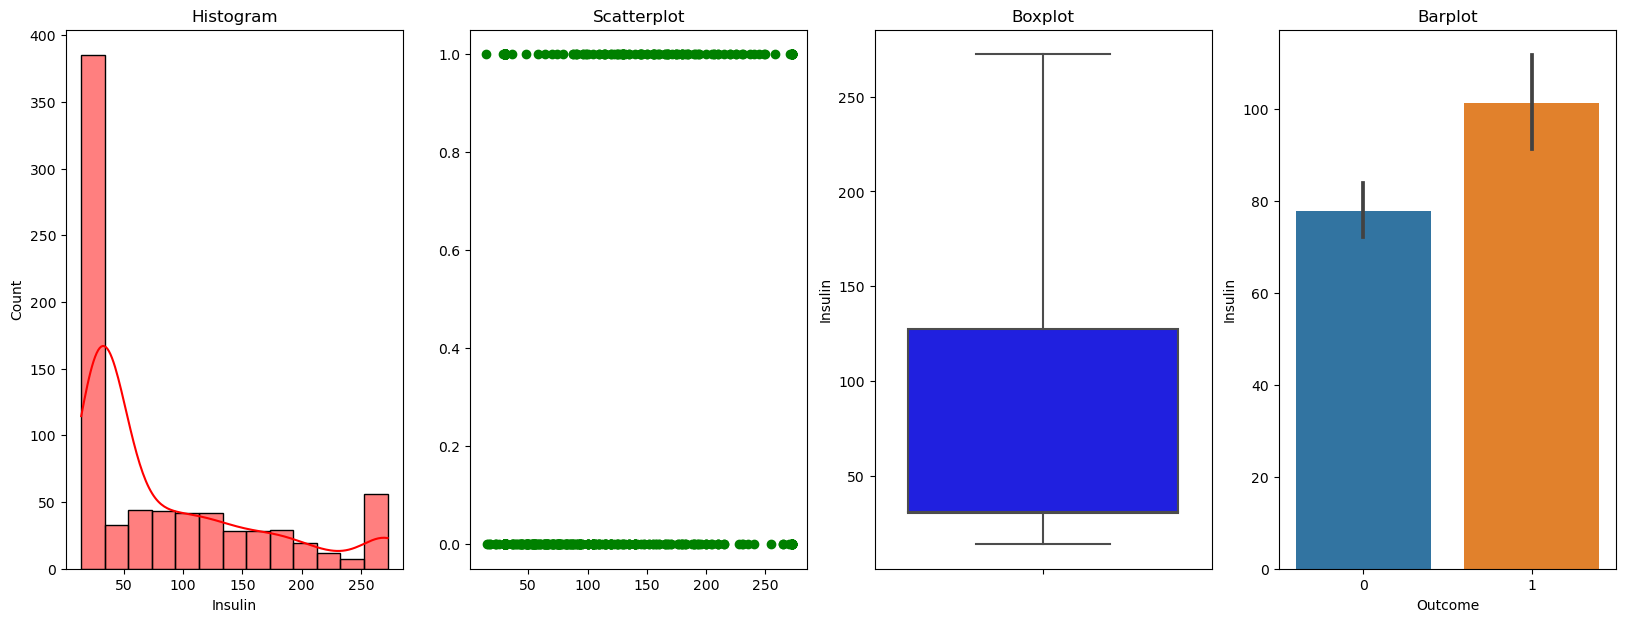

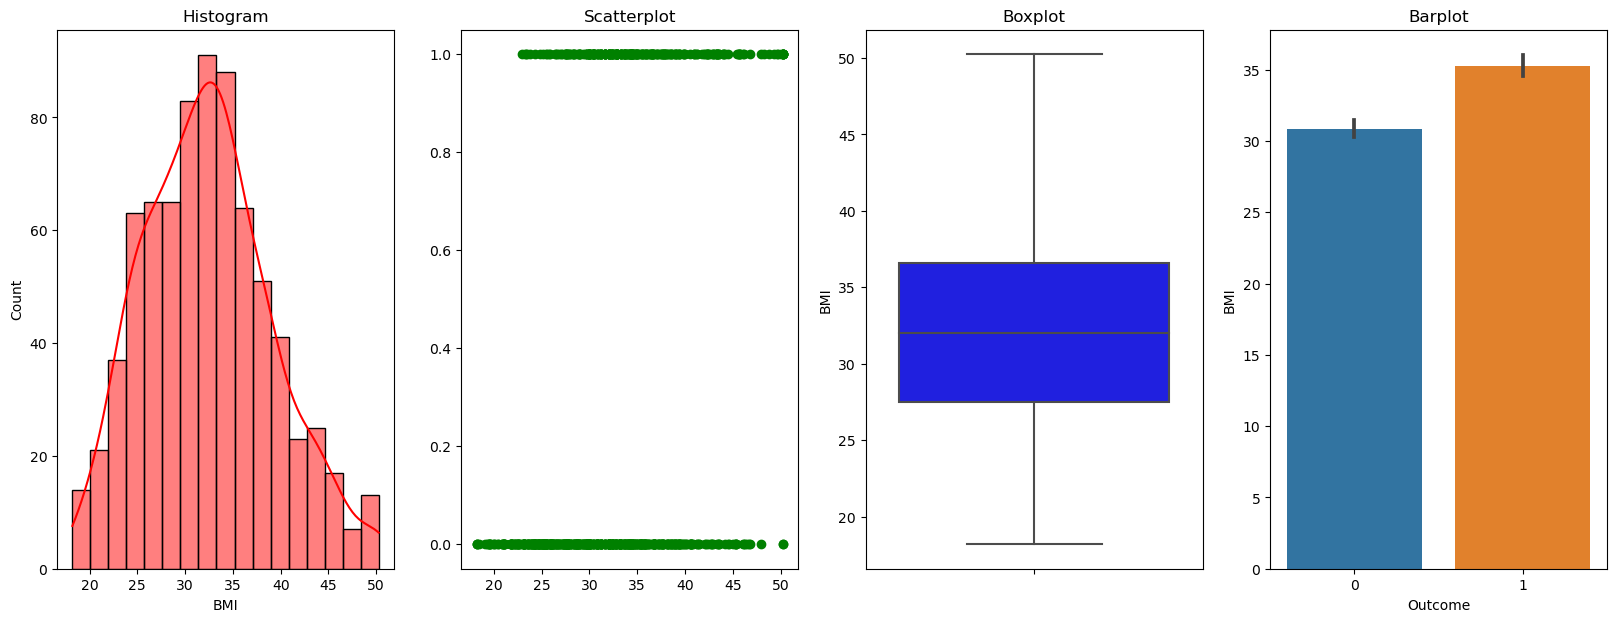

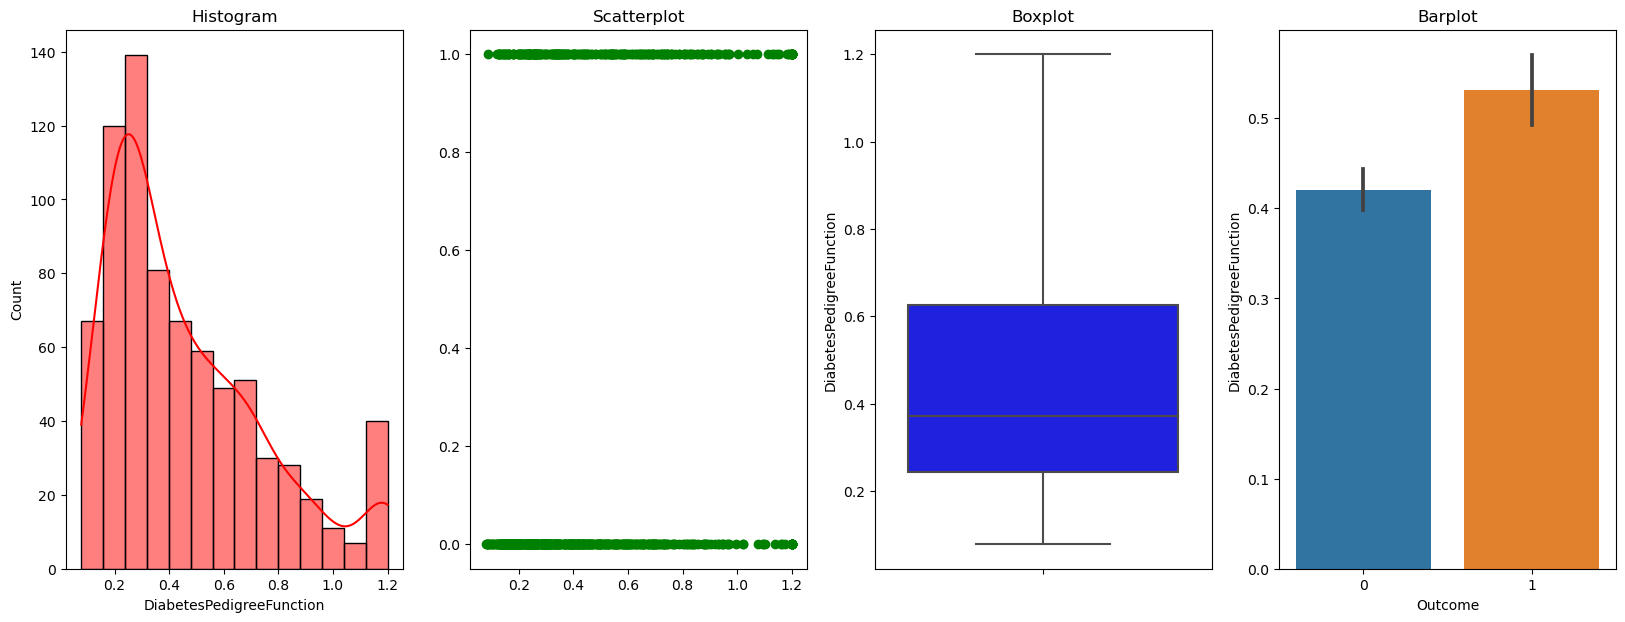

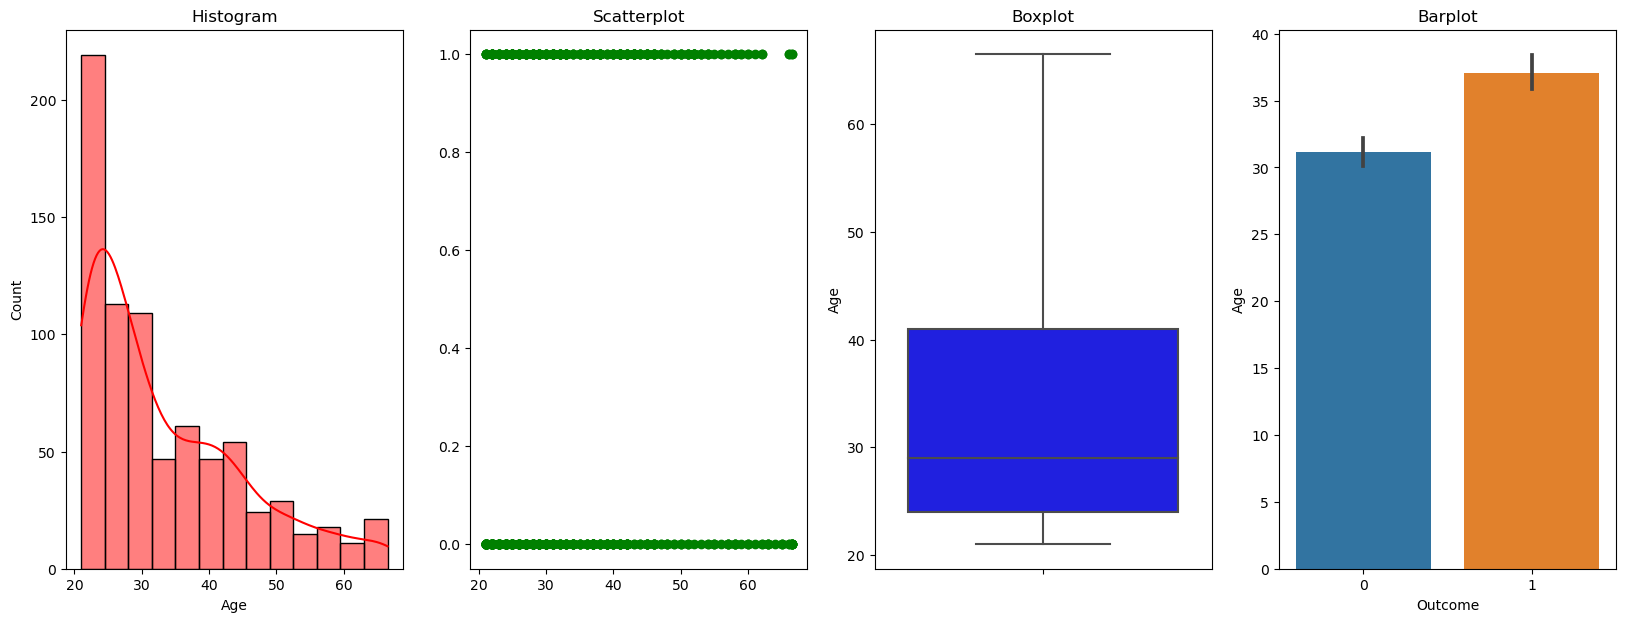

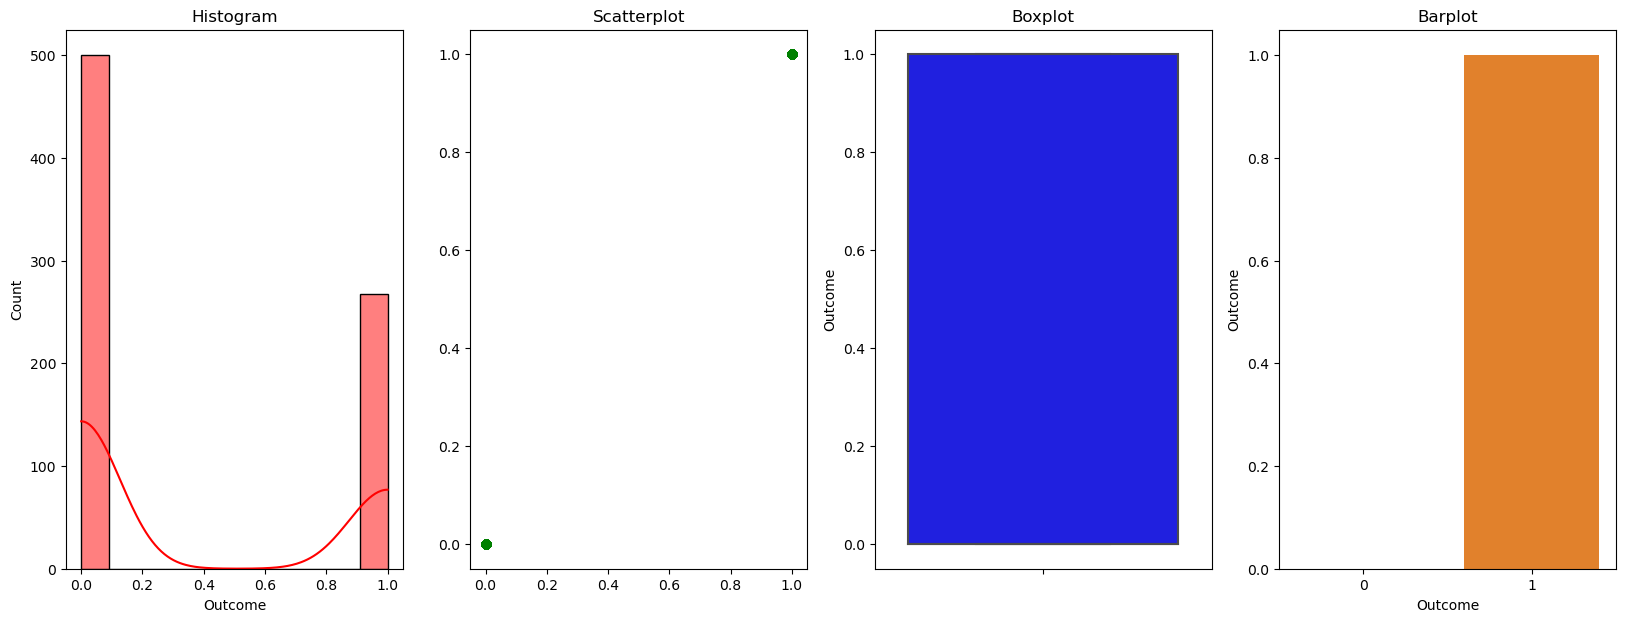

In [27]:
for col in df:
    diagnostic_plots(df,col,'Outcome')

In [28]:
df.to_csv('preprocessed_data.csv',index=False)